<a href="https://colab.research.google.com/github/JaiShree-cloud/AI-Art-Creator/blob/main/AI_Art_Creator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q diffusers transformers accelerate safetensors torch


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

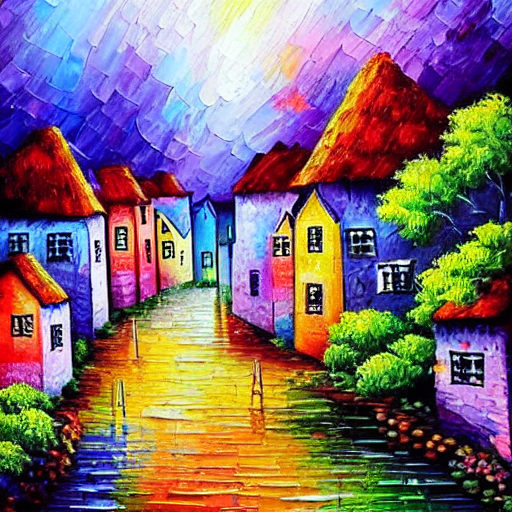

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Load pre-trained Stable Diffusion model
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")

# Text prompt for art generation
prompt = "A beautiful village painting, colorful, artistic, oil painting style"

# Generate image
image = pipe(prompt).images[0]

# Save output
image.save("ai_art.png")

image


In [ ]:
!pip install -q diffusers transformers accelerate safetensors gradio torch


In [ ]:
import torch
import gradio as gr
from diffusers import StableDiffusionPipeline

# Auto-detect device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load pre-trained Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)

# Art generation function
def generate_art(prompt, style):
    full_prompt = f"{prompt}, {style}, high quality, detailed, artistic"
    image = pipe(full_prompt).images[0]
    return image

# Gradio UI
ui = gr.Interface(
    fn=generate_art,
    inputs=[
        gr.Textbox(label="Enter your prompt", placeholder="A village near river"),
        gr.Dropdown(
            ["Oil Painting", "Watercolor", "Pencil Sketch", "Digital Art", "Abstract Art"],
            label="Select Art Style"
        )
    ],
    outputs=gr.Image(type="pil", label="Generated Art"),
    title="🎨 AI Art Creator",
    description="Generate art using a pre-trained Stable Diffusion model"
)

ui.launch()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7df5a6ff2f354c94ed.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
